<a href="https://colab.research.google.com/github/DiGyt/asrpy/blob/main/example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install git+https://github.com/DiGyt/asrpy.git -q

     |████████████████████████████████| 7.4 MB 3.9 MB/s 


In [76]:
import mne
from mne.datasets import eegbci, ssvep
from asrpy import ASR


In [77]:
# Load raw data
data_path = ssvep.data_path()
raw_fname = data_path + '/sub-02/ses-01/eeg/sub-02_ses-01_task-ssvep_eeg.vhdr'
raw = mne.io.read_raw_brainvision(raw_fname, preload=True, verbose=False)

# Set montage
montage = mne.channels.make_standard_montage('easycap-M1')
raw.set_montage(montage, verbose=False)

# Construct epochs
event_id = {'12hz': 255, '15hz': 155}

events, _ = mne.events_from_annotations(raw, verbose=False)

Using default location ~/mne_data for ssvep...


100%|█████████████████████████████████████| 39.5M/39.5M [00:00<00:00, 5.42GB/s]
Unzipping contents of '/root/mne_data/ssvep_example_data.zip' to '/root/mne_data'


In [71]:
# load the raw data
fname = eegbci.load_data(1, [9])[0]
raw = mne.io.read_raw_edf(fname, preload=True)

# strip channel names of "." characters
eegbci.standardize(raw)  # set channel names
raw.rename_channels(lambda x: x.strip('.'))

# set a standard 10-05 montage
montage = mne.channels.make_standard_montage('standard_1005')
raw.set_montage(montage)

# extract the events
events, _ = mne.events_from_annotations(raw, event_id=dict(T1=2, T2=3))
event_id = {'Hand': 2, 'Feet': 3}


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T1', 'T2']
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 529 samples (3.306 sec)



In [78]:
#preprocess
raw.filter(1., None, fir_design='firwin')  # replace baselining with high-pass
raw.pick_types(eeg=True);

tmin, tmax = -0.1, 1.5

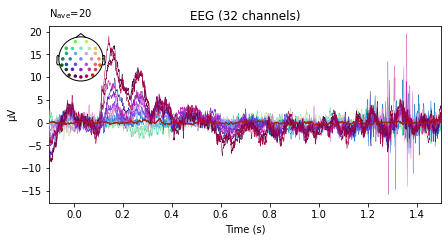

In [80]:
# Epoching
avg = mne.Epochs(raw, events, event_id, tmin, tmax, proj=False,
                picks=None, baseline=None, preload=True,
                verbose=False).average()

# Plot image epoch before xdawn
avg.plot(spatial_colors=True);

In [81]:
asr = ASR(cutoff=20)
asr.fit(raw.get_data())
raw._data = asr.transform(raw.get_data())[:, int(raw.info["sfreq"]*0.25):]

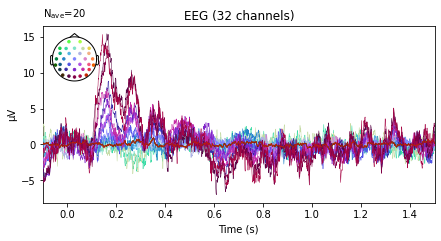

In [83]:
# Epoching
avg = mne.Epochs(raw, events, event_id, tmin, tmax, proj=False,
                picks=None, baseline=None, preload=True,
                verbose=False).average()

# Plot image epoch before xdawn
avg.plot(spatial_colors=True);